<a href="https://colab.research.google.com/github/losornom-spec/PLE-2025-2/blob/main/trabajo_1_10040976099_1000756146.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes y sus cédulas:

Yamid Urrego Galvis           1000756146

Luis Gabriel Osorno Muñoz     1040976099


In [ ]:
# Instalar librerias que se requieran

!pip install pyjanitor

In [ ]:
import pandas as pd
from janitor import clean_names
from warnings import filterwarnings
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt


filterwarnings("ignore")


ruta = "https://github.com/losornom-spec/PLE-2025-2/raw/main/Evaluaciones_Agropecuarias_Municipales_EVA_20250927.csv.zip"
datos = pd.read_csv(ruta,
                    compression="zip",
                    thousands=",",  # Se especifica que el separador de miles es la ","
                    decimal=".")    # Se especifica que el separador de decimales es el "."

# Exploración de la base de datos

In [ ]:
# Verificamos que se haya leido correctamente

datos.head(5)

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [ ]:
datos.shape

(206068, 17)

In [ ]:
datos.columns

Index(['CÓD. \nDEP.', 'DEPARTAMENTO', 'CÓD. MUN.', 'MUNICIPIO',
       'GRUPO \nDE CULTIVO', 'SUBGRUPO \nDE CULTIVO', 'CULTIVO',
       'DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO', 'AÑO', 'PERIODO',
       'Área Sembrada\n(ha)', 'Área Cosechada\n(ha)', 'Producción\n(t)',
       'Rendimiento\n(t/ha)', 'ESTADO FISICO PRODUCCION',
       'NOMBRE \nCIENTIFICO', 'CICLO DE CULTIVO'],
      dtype='object')

In [ ]:
# Se identifican varios problemas relacionados con los nombres de las columnas,
# Se procede a limpiar los nombres de las columnas usando el modulo
# pyjanitor y la funcion clean_names, además caracteres especiales

datos = clean_names(datos, remove_special=True)
datos.columns

Index(['cd_dep_', 'departamento', 'cd_mun_', 'municipio', 'grupo_de_cultivo',
       'subgrupo_de_cultivo', 'cultivo',
       'desagregacin_regional_y_o_sistema_productivo', 'ao', 'periodo',
       'rea_sembrada_ha_', 'rea_cosechada_ha_', 'produccin_t_',
       'rendimiento_t_ha_', 'estado_fisico_produccion', 'nombre_cientifico',
       'ciclo_de_cultivo'],
      dtype='object')

In [ ]:
datos.head()

,cd_dep_,departamento,cd_mun_,municipio,grupo_de_cultivo,subgrupo_de_cultivo,cultivo,desagregacin_regional_y_o_sistema_productivo,ao,periodo,rea_sembrada_ha_,rea_cosechada_ha_,produccin_t_,rendimiento_t_ha_,estado_fisico_produccion,nombre_cientifico,ciclo_de_cultivo
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO


In [ ]:
# Se identifica que se esté leyendo correctamente las variables

datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206068 entries, 0 to 206067
Data columns (total 17 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   cd_dep_                                       206068 non-null  int64  
 1   departamento                                  206068 non-null  object 
 2   cd_mun_                                       206068 non-null  int64  
 3   municipio                                     206067 non-null  object 
 4   grupo_de_cultivo                              206068 non-null  object 
 5   subgrupo_de_cultivo                           206068 non-null  object 
 6   cultivo                                       206068 non-null  object 
 7   desagregacin_regional_y_o_sistema_productivo  206068 non-null  object 
 8   ao                                            206068 non-null  int64  
 9   periodo                                       20

In [ ]:
# Se hace analisis de datos faltantes

# Se identifican principalmente datos faltantes en las variables
# rendimiento_t_ha_ y en nombre_cientifico, ademas de un dato
# faltante en municipio

datos.isna().sum()

,0
cd_dep_,0
departamento,0
cd_mun_,0
municipio,1
grupo_de_cultivo,0
subgrupo_de_cultivo,0
cultivo,0
desagregacin_regional_y_o_sistema_productivo,0
ao,0
periodo,0


<Axes: >

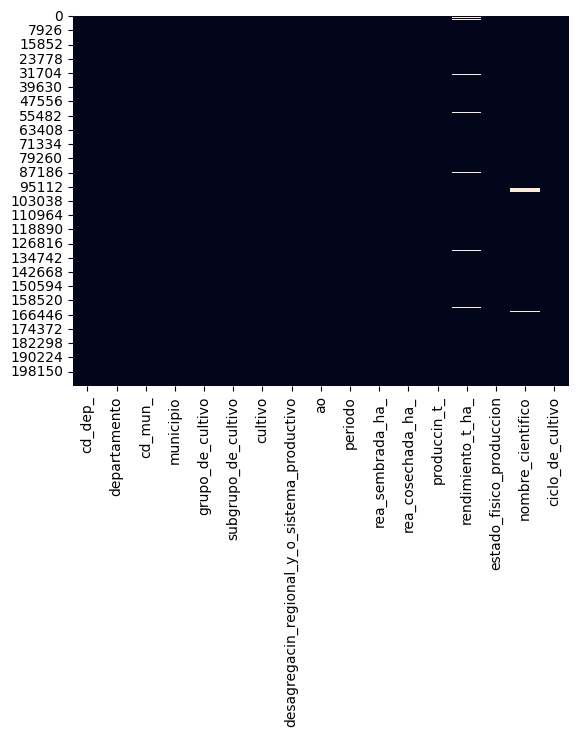

In [ ]:
# Grafico de datos faltantes
# Con el grafico de NAN, se observa que si bien existen varios datos
# Faltantes, todos los registros están bie  leidos

sns.heatmap(datos.isna(), cbar=False)

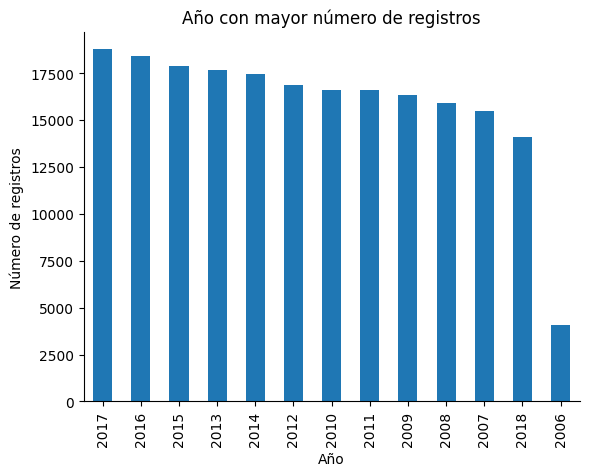

In [ ]:
# (a). ¿Cuál es el año con mayor número de registros en la BD?

datos.ao.value_counts().plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Año con mayor número de registros")
plt.xlabel("Año")
plt.ylabel("Número de registros")
plt.tick_params(top=False, right=False)

In [ ]:
datos.ao.value_counts()

,count
ao,
2017,18756
2016,18399
2015,17900
2013,17649
2014,17434
2012,16856
2010,16619
2011,16592
2009,16318


# Respuesta item (a)

En base al grafico anterior:

- El año con mayor número de registros es 2017 con 18756 cultivos

- Seguido por el 2016 con 18399 registros

- En tercer lugar se encuentra el 2015 con 17900

Text(0, 0.5, 'Número de registros')

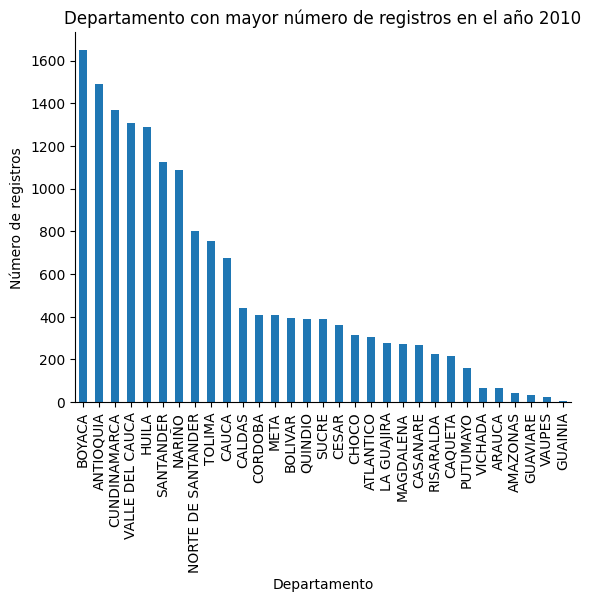

In [ ]:
# (b). En el año 2010, ¿cuál es el departamento con mayor número de registros?

datos.query("ao == 2010").departamento.value_counts().plot(kind="bar").spines[["top", "right"]].set_visible(False)
plt.title("Departamento con mayor número de registros en el año 2010")
plt.xlabel("Departamento")
plt.ylabel("Número de registros")

In [ ]:
datos.query("ao == 2010").departamento.value_counts()

,count
departamento,
BOYACA,1649
ANTIOQUIA,1489
CUNDINAMARCA,1368
VALLE DEL CAUCA,1308
HUILA,1288
SANTANDER,1126
NARIÑO,1087
NORTE DE SANTANDER,803
TOLIMA,756


# Respuesta al item (b)

El departamento con mayor número de registros en el 2010 es:

- Boyacá cuenta con 1649 registros

- Seguido por Antioquía con 1489

- En tercer lugar se encuentra Cundinamarca con 1368

In [ ]:
# (c). En el año 2015, ¿cuál es el municipio con mayor número de registros?